Perceptron: a simple custom built class implementation for the perceptron logic.

src.shared imports: \
numpy as np \
pandas as pd \
matplotlib.pyplot as plt \
utils like load_dataset, calculating metrics, etc.

In [4]:
import sys
from pathlib import Path

project_root = str(Path.cwd().parents[1])

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.classification.perceptron import Perceptron
from src.shared import *

I chose a classic dataset suitable for classification. \
The Iris Species dataset fits this criterion well and is perfect for demonstrating the perceptron.

Average measurements per species:

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


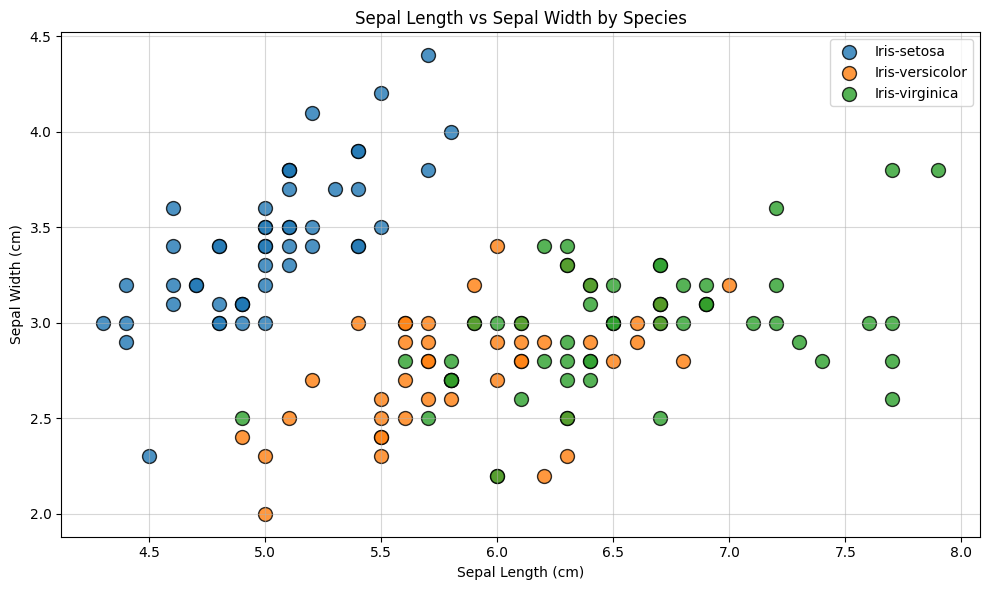

In [5]:
# --- 1. Load Data ---
df = load_dataset('iris_species')

# --- 2. Data Cleaning ---
# no need to clean as the dataset is already clean


# --- 3. Analysis ---
# Average measurements per species
species_stats = df.drop('Id', axis=1).groupby('Species').mean()

print("Average measurements per species:\n")
print(species_stats)


# --- 4. Visualization ---
plt.figure(figsize=(10, 6))


for i, (name, group) in enumerate(df.groupby('Species')):
    plt.scatter(
        x=group['SepalLengthCm'],
        y=group['SepalWidthCm'],
        label=name,
        edgecolors='black',
        alpha=0.8,
        s=100
    )

plt.title("Sepal Length vs Sepal Width by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Training on 80 samples
Testing on 20 samples

--- Testing Results ---
Accuracy: 95.00%


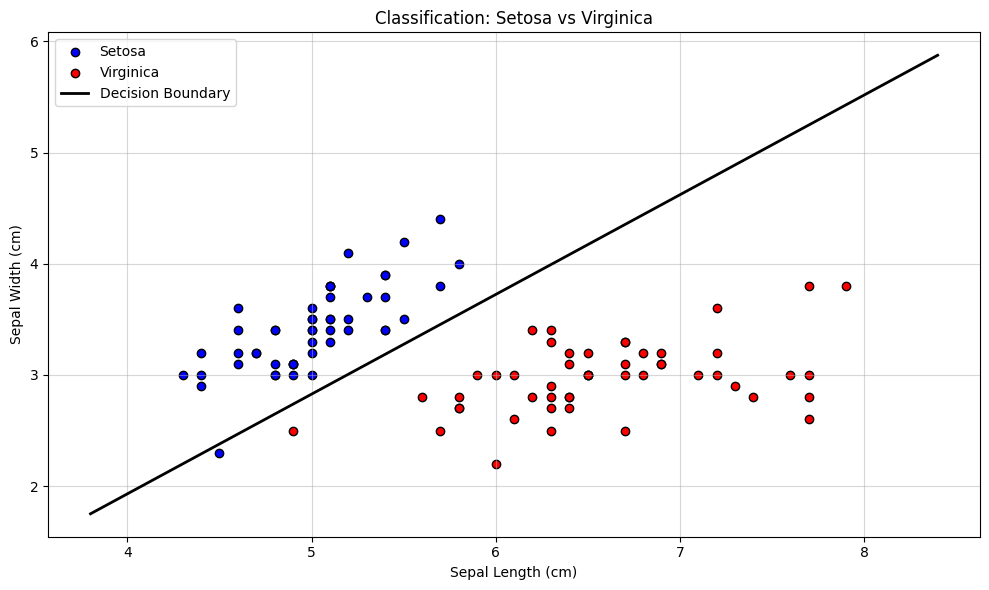

In [6]:
# --- 1. Select Features & Target ---
df_binary = df[df['Species'].isin(['Iris-setosa', 'Iris-virginica'])]

# Using only two features for the classification so we can later on visualize the decision boundary in a 2D plot. 
# We can do this since these two species are well separated in these two features, so we don't need other factors.
X = df_binary[['SepalLengthCm', 'SepalWidthCm']].values
y = np.where(df_binary['Species'] == 'Iris-setosa', 1, -1) # Some perceptrons use 1 and -1, others use 1 and 0


# --- 2. Split Data for training & testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)


# Normalize features to 0-1 range for better performance
train_min = X_train.min(axis=0)
train_range = X_train.max(axis=0) - train_min + 1e-15

X_train = (X_train - train_min) / train_range
X_test = (X_test - train_min) / train_range


# --- 3. Training ---
print(f"Training on {len(X_train)} samples")

model = Perceptron()
model.fit(X_train, y_train, learning_rate=1, n_epochs=500, show_progress=False)


# --- 4. Evaluation ---
print(f"Testing on {len(X_test)} samples")

print("\n--- Testing Results ---")
predictions = model.predict(X_test)

accuracy = calculate_accuracy(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


# --- 5. Visualization ---
plt.figure(figsize=(10, 6))

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Setosa', edgecolors='black')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='Virginica', edgecolors='black')

# 2. Calculate the Decision Boundary for the original scale
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x_vals_raw = np.array([x_min, x_max])
x_vals_norm = (x_vals_raw - train_min[0]) / train_range[0]
w = model.weights
y_vals_norm = -(w[0] * x_vals_norm + w[2]) / w[1]
y_vals_raw = y_vals_norm * train_range[1] + train_min[1]

plt.plot(x_vals_raw, y_vals_raw, 'black', linewidth=2, label='Decision Boundary')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Classification: Setosa vs Virginica')

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

If you used a random seed and suddenly the descision boundary did not include a point or moved much, it's probably because the model was not trained for this point (since it wasn't in the training data), and the point is probably an outlier.